In [56]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [57]:
import yfinance as yf

In [58]:
sp500 = yf.Ticker("^GSPC")

In [59]:
sp500 = sp500.history(period='max')

In [60]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,0.0,0.0
2024-03-25 00:00:00-04:00,5219.520020,5229.089844,5216.089844,5218.189941,3331360000,0.0,0.0
2024-03-26 00:00:00-04:00,5228.850098,5235.160156,5203.419922,5203.580078,3871790000,0.0,0.0


In [61]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-03-15 00:00:00-04:00', '2024-03-18 00:00:00-04:00',
               '2024-03-19 00:00:00-04:00', '2024-03-20 00:00:00-04:00',
               '2024-03-21 00:00:00-04:00', '2024-03-22 00:00:00-04:00',
               '2024-03-25 00:00:00-04:00', '2024-03-26 00:00:00-04:00',
               '2024-03-27 00:00:00-04:00', '2024-03-28 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24176, freq=None)

<Axes: xlabel='Date'>

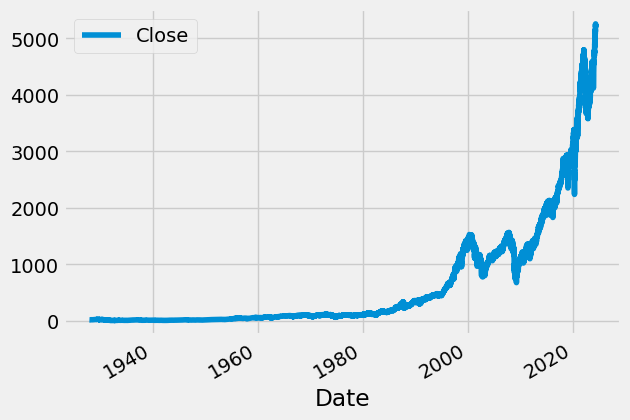

In [62]:
sp500.plot.line(y="Close", use_index=True)

In [63]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [64]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000
2024-03-25 00:00:00-04:00,5219.520020,5229.089844,5216.089844,5218.189941,3331360000
2024-03-26 00:00:00-04:00,5228.850098,5235.160156,5203.419922,5203.580078,3871790000


In [65]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [66]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,5218.189941
2024-03-25 00:00:00-04:00,5219.520020,5229.089844,5216.089844,5218.189941,3331360000,5203.580078
2024-03-26 00:00:00-04:00,5228.850098,5235.160156,5203.419922,5203.580078,3871790000,5248.490234


In [67]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,5218.189941,0
2024-03-25 00:00:00-04:00,5219.520020,5229.089844,5216.089844,5218.189941,3331360000,5203.580078,0
2024-03-26 00:00:00-04:00,5228.850098,5235.160156,5203.419922,5203.580078,3871790000,5248.490234,1


In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [69]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [70]:
preds = pd.Series(preds, index=test.index)

In [71]:
precision_score(test["Target"], preds)

0.6

<Axes: xlabel='Date'>

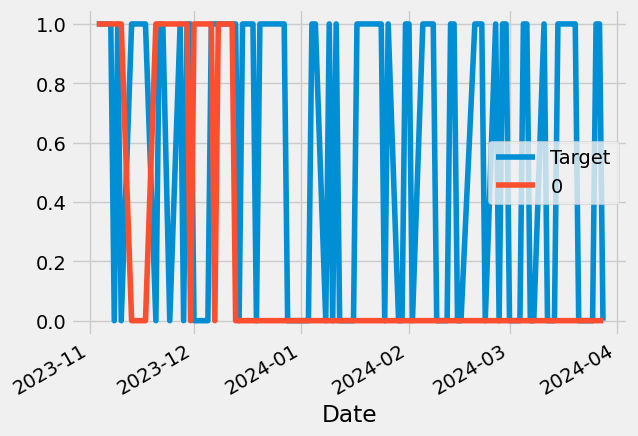

In [72]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined.plot()

In [85]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [86]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []
  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [87]:
predictions = backtest(sp500, model, predictors)

In [88]:
predictions["Predictions"].value_counts()

1    130
0    120
Name: Predictions, dtype: int64

In [89]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5

In [91]:
predictions["Target"].value_counts() / predictions.shape[0]

0    0.508
1    0.492
Name: Target, dtype: float64

In [92]:
horizaons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizaons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [93]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0,1.002823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0,0.998873,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1,0.995180,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0,1.003124,1.0,0.999434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,5218.189941,0,0.999298,1.0,1.005480,4.0,1.054020,34.0,1.161411,140.0,1.282147,534.0
2024-03-25 00:00:00-04:00,5219.520020,5229.089844,5216.089844,5218.189941,3331360000,5203.580078,0,0.998470,0.0,0.999767,3.0,1.049263,33.0,1.156589,139.0,1.277388,533.0
2024-03-26 00:00:00-04:00,5228.850098,5235.160156,5203.419922,5203.580078,3871790000,5248.490234,1,0.998598,0.0,0.996011,2.0,1.044854,32.0,1.152093,139.0,1.272965,533.0


In [94]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1931-12-29 00:00:00-05:00,7.960000,7.960000,7.960000,7.960000,0,8.100000,1,1.012723,1.0,0.996994,3.0,0.821282,24.0,0.582074,105.0,0.394305,521.0
1931-12-30 00:00:00-05:00,8.100000,8.100000,8.100000,8.100000,0,8.120000,1,1.008717,2.0,1.019381,3.0,0.837787,25.0,0.593657,105.0,0.401432,521.0
1931-12-31 00:00:00-05:00,8.120000,8.120000,8.120000,8.120000,0,7.560000,0,1.001233,2.0,1.017544,4.0,0.842149,25.0,0.596489,105.0,0.402615,522.0
1932-01-04 00:00:00-05:00,7.560000,7.560000,7.560000,7.560000,0,7.550000,0,0.964286,1.0,0.956962,3.0,0.785781,25.0,0.556754,104.0,0.375034,522.0
1932-01-05 00:00:00-05:00,7.550000,7.550000,7.550000,7.550000,0,8.080000,1,0.999338,0.0,0.960804,3.0,0.787963,24.0,0.557255,104.0,0.374726,521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21 00:00:00-04:00,5253.430176,5261.100098,5240.660156,5241.529785,4207730000,5234.180176,0,1.001616,2.0,1.011442,4.0,1.057130,35.0,1.164347,141.0,1.284817,534.0
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,5218.189941,0,0.999298,1.0,1.005480,4.0,1.054020,34.0,1.161411,140.0,1.282147,534.0
2024-03-25 00:00:00-04:00,5219.520020,5229.089844,5216.089844,5218.189941,3331360000,5203.580078,0,0.998470,0.0,0.999767,3.0,1.049263,33.0,1.156589,139.0,1.277388,533.0


In [97]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [98]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [99]:
predictions = backtest(sp500, model, new_predictors)

In [100]:
predictions["Predictions"].value_counts()

0    172
1     78
Name: Predictions, dtype: int64

In [101]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5